# STEREO-PROSPECT Joint 235U Unfolding Supplemental Materials

## Introduction

This is a brief technical note detailing the usage of the Supplemental Materials provided with this publication.
It is written in `python==3.9`, using both `numpy==1.19` and `matplotlib==3.4.1` to read and visualize the data.
The intent is to demonstrate how these data can be used to both recreate the comparisons in the publication and serve as an example of how further comparisons can be made.


## Contents

```
TikhonovJointUnfolding_CovarianceMatrix.txt
TikhonovJointUnfolding_FilterMatrix.txt
TikhonovJointUnfolding_Spectrum.txt
WienerJointUnfolding_CovarianceMatrix.txt
WienerJointUnfolding_FilterMatrix.txt
WienerJointUnfolding_Spectrum.txt
HuberModel.txt
```

The unfolded spectrum, covariance matrix, and the smearing filter matrix are provided for the two frameworks discussed in this work.
In this tech-note we will demonstrate how these can be used to reproduce the key results from the publication.

Also provided is the normalized Huber model, after applying IBD cross-section, for comparison to the unfolded $^{235}$U antineutrino spectrum.

## Reading the data

The data are tabulated in comma-separated value format with detailed headers. For the spectra and the Huber model, bin centers are provided with bin widths of 0.250MeV. For visualization, it is common to use _bin edges_ which have been calculated by adding/subtracting half the bin width from the extreme bin centers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
bin_centers, spectrum_wsvd = np.loadtxt('WienerJointUnfolding_Spectrum.txt', unpack=True, delimiter=',')
bin_centers, spectrum_t = np.loadtxt('TikhonovJointUnfolding_Spectrum.txt', unpack=True, delimiter=',')

bin_width = 0.25
bin_edges = np.linspace(start=bin_centers[0]-bin_width/2, stop=bin_centers[-1]+bin_width/2, num=len(bin_centers)+1)

In [3]:
covmat_t = np.loadtxt('TikhonovJointUnfolding_CovarianceMatrix.txt', delimiter=',')
covmat_wsvd = np.loadtxt('WienerJointUnfolding_CovarianceMatrix.txt', delimiter=',')

In [4]:
filter_t = np.loadtxt('TikhonovJointUnfolding_FilterMatrix.txt', delimiter=',')
filter_wsvd = np.loadtxt('WienerJointUnfolding_FilterMatrix.txt', delimiter=',')

In [5]:
bc_huber, spectrum_huber = np.loadtxt('HuberModel.txt', unpack=True, delimiter=',')
be_huber = np.linspace(start=bc_huber[0]-0.125, stop=bc_huber[-1]+0.125, num=len(bc_huber)+1)

## Visualize the data

Starting with the covariance matrices for the two unfolding techniques, we show how the two differ in their treatment of uncertainties.
Note how the WienerSVD method is more uniform, but with increased off-diagonal components, than the Tikhonov.  

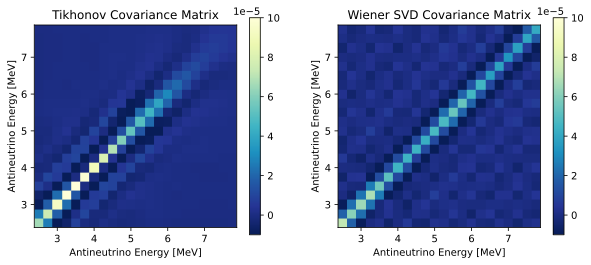

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,4))

plt.sca(ax[0])
plt.imshow(covmat_t, origin='lower', 
           extent=(bin_edges[0],bin_edges[-1],bin_edges[0],bin_edges[-1]), 
           vmin=-1e-5, vmax=1e-4)
plt.xlabel('Antineutrino Energy [MeV]')
plt.ylabel('Antineutrino Energy [MeV]')
plt.title('Tikhonov Covariance Matrix');
plt.colorbar()

plt.sca(ax[1])
plt.imshow(covmat_wsvd, origin='lower', 
           extent=(bin_edges[0],bin_edges[-1],bin_edges[0],bin_edges[-1]), 
           vmin=-1e-5, vmax=1e-4)
plt.xlabel('Antineutrino Energy [MeV]')
plt.ylabel('Antineutrino Energy [MeV]')
plt.title('Wiener SVD Covariance Matrix');
plt.colorbar();


Comparing the respective filter matrices we see a similar difference where the WienerSVD method is more uniform but with increased off-diagonal elements.


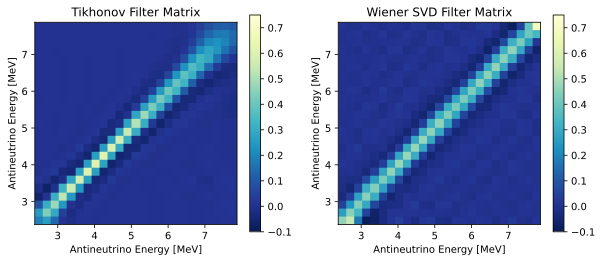

In [7]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,4))

plt.sca(ax[0])
plt.imshow(filter_t, origin='lower', 
           extent=(bin_edges[0],bin_edges[-1],bin_edges[0],bin_edges[-1]), 
           vmin=-0.1, vmax=0.75)
plt.xlabel('Antineutrino Energy [MeV]')
plt.ylabel('Antineutrino Energy [MeV]')
plt.title('Tikhonov Filter Matrix');
plt.colorbar()

plt.sca(ax[1])
plt.imshow(filter_wsvd, origin='lower', 
           extent=(bin_edges[0],bin_edges[-1],bin_edges[0],bin_edges[-1]), 
           vmin=-0.1, vmax=0.75)
plt.xlabel('Antineutrino Energy [MeV]')
plt.ylabel('Antineutrino Energy [MeV]')
plt.title('Wiener SVD Filter Matrix');
plt.colorbar();



Finally, we can directly compare the unfolded spectra from the two frameworks. While there are small differences, overall the spectra are very similar.

In [8]:
plt.stairs(spectrum_wsvd, bin_edges, label='Wiener SVD', color='C0')
plt.errorbar(bin_centers, spectrum_wsvd, yerr=np.sqrt(np.diagonal(covmat_wsvd)),
             linestyle='None', marker='None', color='C0')


plt.stairs(spectrum_t, bin_edges, label='Tikhonov', color='C1')
plt.errorbar(bin_centers, spectrum_t, yerr=np.sqrt(np.diagonal(covmat_t)), 
             linestyle='None', marker='None', color='C1')


plt.xlabel('Antineutrino Energy [MeV]')
plt.ylabel('Counts/bin (arb)');
plt.legend();

In [9]:
plt.errorbar(bin_centers, (spectrum_wsvd)/(spectrum_t), 
             yerr=np.sqrt(np.diagonal(covmat_wsvd))/(spectrum_t), 
             linestyle='None', marker='.', color='C0')

plt.hlines(y=1,xmax=8,xmin=2, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Antineutrino Energy [MeV]')
plt.ylabel('Ratio (WSVD/T)');
plt.xlim(2,8);plt.ylim(0.25,1.75)

(0.25, 1.75)

## Comparison to Huber 235U

Finally, we reproduce Figure 3 from the text using the supplemental materials. In this comparison we demonstrate the use of the $A_c$ filter matrix to apply appropriate smoothing to the theoretical model generated by Huber. 

Note that, for the specific case of the Tikhonov regularization implemented in this publication, the filtered prior spectrum is identical to the prior spectrum, i.e. the filtered Huber $^{235}$U model _is_ the Huber $^{235}$U model. This does not hold for other models to be filtered.


In [10]:
spectrum_huber_filtered = np.matmul(filter_t, spectrum_huber)

The filter matrices and Huber model are provided with extended energy range compared to the data. Therefore we will need to re-normalize the Huber model to match the energy range of the unfolded spectra.

In [11]:
spectrum_huber_filtered = spectrum_huber_filtered[2:-1] / sum(spectrum_huber_filtered[2:-1]) / bin_width

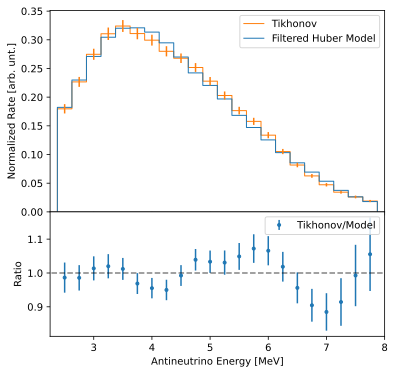

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, squeeze=True, gridspec_kw = {'height_ratios':[1.618, 1]}, figsize=(6,6))
fig.subplots_adjust(hspace=0)

plt.sca(ax1)
ax1.stairs(spectrum_t, bin_edges, label='Tikhonov', color='C1')
ax1.errorbar(bin_centers, spectrum_t, yerr=np.sqrt(np.diagonal(covmat_t)), 
             linestyle='None', marker='None', color='C1')

ax1.stairs(spectrum_huber_filtered, bin_edges, label='Filtered Huber Model')
plt.ylabel("Normalized Rate [arb. unt.]")
plt.legend();

plt.sca(ax2)
ax2.errorbar(bin_centers, spectrum_t/spectrum_huber_filtered, yerr=np.sqrt(np.diagonal(covmat_t))/spectrum_huber_filtered, 
             linestyle='None', marker='.', color='C0', label='Tikhonov/Model')

ax2.hlines(y=1, xmin=2, xmax=8, color='k', alpha=0.5, linestyle='--')

plt.ylabel('Ratio')
plt.xlabel('Antineutrino Energy [MeV]')
plt.xlim(2.25,8);
plt.legend();

## Conclusions

We have demonstrated how to read the supplemental materials. In this short note we have performed a direct comparison between the two frameworks utilized in this publication and reacreated one of the main figures. 